In [1]:
import pandas as pd
def my_model(x_1,x_2):
    """Represent f from above"""
    return x_1**x_2

In [2]:
y=my_model(2,4)
y

16

In [3]:
x1_values=[10,20,30]
x2_values=[1,2,3]

In [4]:
#nested loop
for x1 in x1_values:
    for x2 in x2_values:
        print(x1,x2)

10 1
10 2
10 3
20 1
20 2
20 3
30 1
30 2
30 3


In [5]:
for x1 in x1_values:
    for x2 in x2_values:
        y_i=my_model(x1,x2)
        print(y_i)

10
100
1000
20
400
8000
30
900
27000


In [6]:
outputs=[]
for x1 in x1_values:
    for x2 in x2_values:
        y_i=my_model(x1,x2)
        outputs.append((x1,x2,y_i))
outputs

[(10, 1, 10),
 (10, 2, 100),
 (10, 3, 1000),
 (20, 1, 20),
 (20, 2, 400),
 (20, 3, 8000),
 (30, 1, 30),
 (30, 2, 900),
 (30, 3, 27000)]

In [7]:
df=pd.DataFrame(outputs,columns=['x_1','x_2','y'])
df

,x_1,x_2,y
0,10,1,10
1,10,2,100
2,10,3,1000
3,20,1,20
4,20,2,400
5,20,3,8000
6,30,1,30
7,30,2,900
8,30,3,27000


In [8]:
df.style.background_gradient(subset='y',cmap='RdYlGn')

,x_1,x_2,y
0,10,1,10
1,10,2,100
2,10,3,1000
3,20,1,20
4,20,2,400
5,20,3,8000
6,30,1,30
7,30,2,900
8,30,3,27000


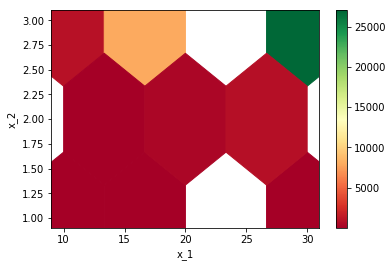

In [9]:
df.plot.hexbin(x='x_1',y='x_2',C='y', gridsize=3,cmap='RdYlGn',sharex=False)#gridsize=3 3 by 3 blocks

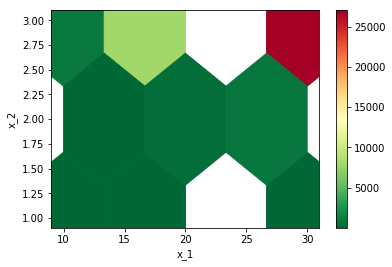

In [10]:
df.plot.hexbin(x='x_1',y='x_2',C='y', gridsize=3,cmap='RdYlGn_r',sharex=False)#Green represents early to retired

In [11]:
from sensitivity import SensitivityAnalyzer
sensitivity_dict={
    'x_1':[10,20,30],
    'x_2':[1,2,3]
}
sa=SensitivityAnalyzer(sensitivity_dict,my_model)

100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 499.35it/s]


In [12]:
sa.df

,x_1,x_2,Result
0,10,1,10
1,10,2,100
2,10,3,1000
3,20,1,20
4,20,2,400
5,20,3,8000
6,30,1,30
7,30,2,900
8,30,3,27000


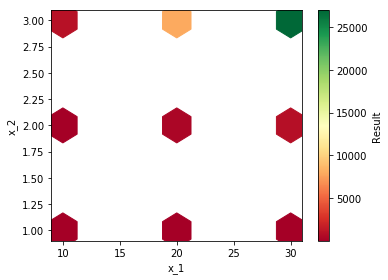

In [13]:
plot=sa.plot()

In [14]:
styled=sa.styled_dfs()

,1,2,3
x_1,,,
10,10.000000,100.000000,1000.000000
20,20.000000,400.000000,8000.000000
30,30.000000,900.000000,27000.000000


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 561.94it/s]


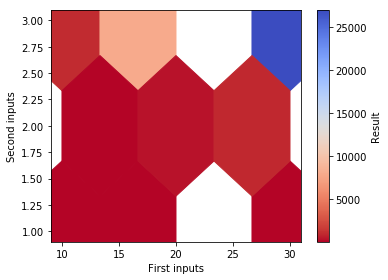

In [15]:
labels={
    'x_1':'First inputs',
    'x_2':'Second inputs'
}
sa=SensitivityAnalyzer(
    sensitivity_dict,my_model,grid_size=3,reverse_colors=True,color_map='coolwarm',labels=labels
)
plot=sa.plot()

In [16]:
def my_model_2(x_1,x_2,x_3):
    return x_1*x_2**x_3
sensitivity_dict={
    'x_1':[1,2,3],
    'x_2':[4,5,6],
    'x_3':[7,8,9]
}
sa=SensitivityAnalyzer(sensitivity_dict,my_model_2,grid_size=3)

100%|█████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 817.47it/s]


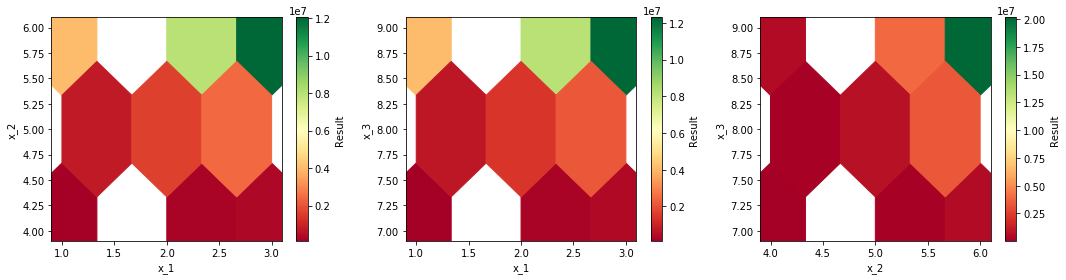

In [17]:
plot=sa.plot()

In [18]:
styled_dict=sa.styled_dfs()
styled_dict

,4,5,6
x_1,,,
1,114688.000000,807291.666667,4012416.000000
2,229376.000000,1614583.333333,8024832.000000
3,344064.000000,2421875.000000,12037248.000000


,7,8,9
x_1,,,
1,124815.000000,711925.666667,4097655.000000
2,249630.000000,1423851.333333,8195310.000000
3,374445.000000,2135777.000000,12292965.000000


,7,8,9
x_2,,,
4,32768.000000,131072.000000,524288.000000
5,156250.000000,781250.000000,3906250.000000
6,559872.000000,3359232.000000,20155392.000000


{('x_1', 'x_2'): <pandas.io.formats.style.Styler at 0x19b065f3c88>,
 ('x_1', 'x_3'): <pandas.io.formats.style.Styler at 0x19b06450b38>,
 ('x_2', 'x_3'): <pandas.io.formats.style.Styler at 0x19b063afa20>}

In [19]:
styled_dict[('x_1', 'x_2')]

,4,5,6
x_1,,,
1,114688.000000,807291.666667,4012416.000000
2,229376.000000,1614583.333333,8024832.000000
3,344064.000000,2421875.000000,12037248.000000


In [20]:
styled_dict=sa.styled_dfs(num_fmt='${:,.1f}')

,4,5,6
x_1,,,
1,"$114,688.0","$807,291.7","$4,012,416.0"
2,"$229,376.0","$1,614,583.3","$8,024,832.0"
3,"$344,064.0","$2,421,875.0","$12,037,248.0"


,7,8,9
x_1,,,
1,"$124,815.0","$711,925.7","$4,097,655.0"
2,"$249,630.0","$1,423,851.3","$8,195,310.0"
3,"$374,445.0","$2,135,777.0","$12,292,965.0"


,7,8,9
x_2,,,
4,"$32,768.0","$131,072.0","$524,288.0"
5,"$156,250.0","$781,250.0","$3,906,250.0"
6,"$559,872.0","$3,359,232.0","$20,155,392.0"
